In [ ]:
#Make images of 1-3 proton tracks
#Label new images number of tracks
#Normalize new images

In [ ]:
#Actual work (instead of experimenting) begins at comment "Combining begins"

In [1]:
import tensorflow as tf
import sklearn
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import random

In [2]:
hf = h5py.File('simulated-attpc-events.h5', 'r')

In [3]:
data = hf['features']
label = hf['targets']

In [4]:
data.shape

(50000, 128, 128)

In [5]:
data[0].shape

(128, 128)

In [6]:
#from numpy import expand_dims
#data=expand_dims(data, axis=3)
#data.shape

In [7]:
#data1 = np.concatenate((data[0], data[1]), axis=-1)
#data1.shape

In [8]:
#Normalize
#data1 = data1/255.0

In [9]:
#plt.imshow(data1)

In [37]:
img = data[4] + data[5]

In [38]:
img.shape

(128, 128)

In [39]:
#img = np.squeeze(img, axis=2)
#img.shape

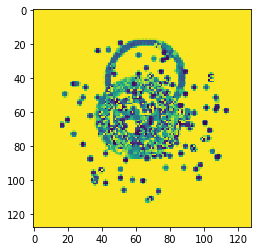

In [40]:
plt.imshow(img)

In [24]:
#for i in range(49999):
#    combdata[i] = data[i] + data[i+1]
#dimension issues?

In [16]:
combdata.shape

(128, 128)

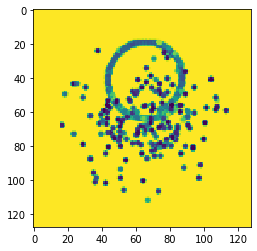

In [41]:
plt.imshow(data[4])

In [22]:
#combdata = [i+j for i,j in zip(data[::2], data[1::2])]
#makes a list

In [35]:
print(label[5])

0


In [45]:
#Testing random # generator
random.randint(1,3)

2

In [ ]:
#Combining begins

In [48]:
type(data)
protons = label[label==0]

In [47]:
#for i in range(0,100):
#    track = random.randint(1,3)
#    if track = 1

In [49]:
print(protons.shape)

()


In [50]:
#into numpy array
np.argwhere(label==0)

array([], shape=(0, 0), dtype=int64)

In [51]:
print(label.shape)

(50000,)


In [52]:
print(label[:10])

[1 2 2 1 0 0 2 1 2 2]


In [53]:
label[label==0]

1

In [54]:
label=np.array(label)

In [55]:
label[label==0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [58]:
#only zeros numpy array
np.argwhere(label==0).reshape(-1)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [59]:
data=np.array(data)

In [60]:
protons = data[np.argwhere(label==0).reshape(-1)]

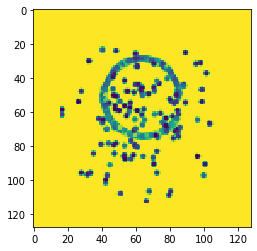

In [64]:
plt.imshow(protons[225])

In [65]:
print(protons.shape)

(16756, 128, 128)


In [148]:
new_data=[]
count=[]
for i in range(40000):
    indices = np.random.choice(protons.shape[0], 3, False) #choose three random proton tracks
    track = random.randint(1,3)
    if track == 1: #use one of the selected proton tracks
        image = protons[indices[0]]

    elif track == 2: #combine and normalize two of the selected proton tracks
        image = (protons[indices[0]]+protons[indices[1]])*(1/2)

    elif track == 3: #combine and normalize all three of the selected proton tracks
        image = (1/3) * (protons[indices[0]]+protons[indices[1]]+protons[indices[2]])
        
    new_data.append(image)
    count.append(track)
    

In [149]:
#making combined tracks into numpy array
new_data=np.array(new_data)

In [150]:
print(new_data.shape)

(40000, 128, 128)


In [151]:
count=np.array(count)

In [152]:
print(count.shape)

(40000,)


In [142]:
print(new_data[4].shape)

(128, 128)


In [143]:
#print(image[4])

In [144]:
print(count[5])

3


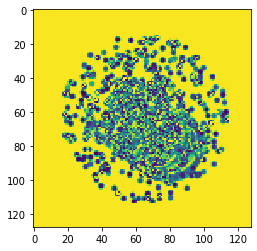

In [145]:
plt.imshow(new_data[5])

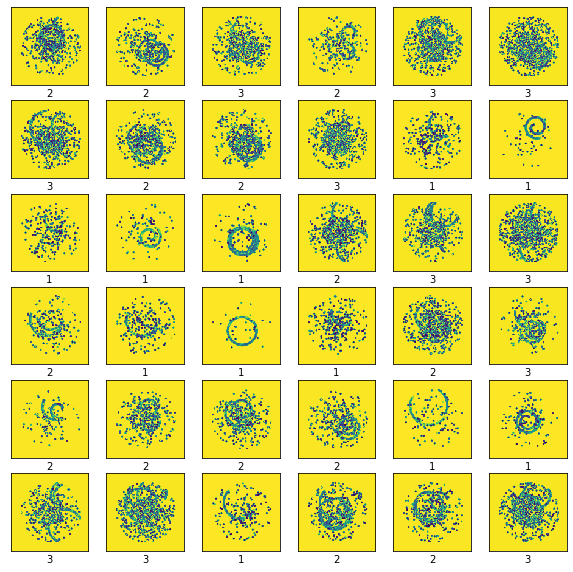

In [146]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(new_data[i])
    plt.xlabel(count[i])
plt.show()

In [147]:
#make h5 file
f = h5py.File("layered-proton-tracks.h5", "w")

In [153]:
dset = f.create_dataset("features", data=new_data)
dset2 = f.create_dataset("targets", data=count)

In [154]:
list(f.keys())

['features', 'targets']

In [155]:
f['features'].shape

(40000, 128, 128)

In [156]:
f.close()